In [15]:
using MAT 
using DelimitedFiles
using Plots; gr();
using StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278


# Compare lat long distribution before and after resampling

In [14]:
dat, header = readdlm("../data/remote/base_nobin/bsr_ignmajors_1.csv", ',', header=true);
header= header[:];

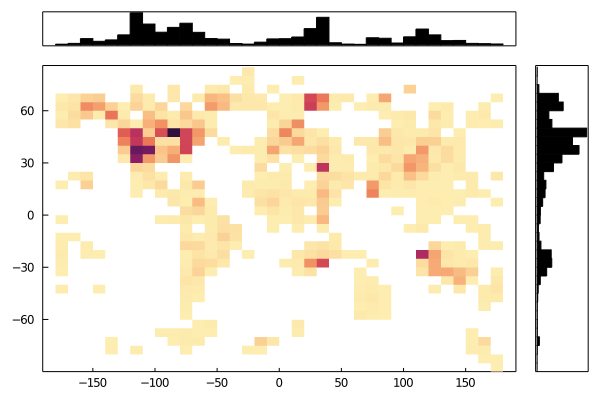

In [118]:
marginalhist(dat[:,findfirst(isequal("Longitude"),header)], dat[:,findfirst(isequal("Latitude"),header)],bins=60, color=:matter, frame=:box, grid=true)
#savefig("viz/resampledlatlong")

In [7]:
ign = matread("../igncn1.mat");

In [131]:
h1 = stephist(ign["Latitude"], normalize=:pdf, bins=60, linewidth=2, size=(600,100), color=:mediumseagreen, alpha=.85)
h1 = stephist!(h1, dat[:,findfirst(isequal("Latitude"),header)], normalize=:pdf, legend=false, bins=60, linewidth=3, grid=false, xaxis=false, yaxis=false, xticks=false, yticks=false)
#h1 = stephist!(h1, ign["Latitude"], normalize=:pdf, bins=60, linewidth=2, linestyle=:dot)
#savefig(h1, "viz/lathist.pdf")

h2 = stephist(ign["Longitude"], normalize=:pdf, label="Before resampling", linewidth=2, bins=60, grid=false, size=(600,100), color=:mediumseagreen, alpha=.85)
h2 = stephist!(h2, dat[:,findfirst(isequal("Longitude"),header)], normalize=:pdf, legend=true, bins=60, label="After resampling", linewidth=2, foreground_color_legend = nothing, xaxis=false, yaxis=false, xticks=false, yticks=false)
#savefig(h2, "viz/longhist.pdf")

h3 = stephist(ign["Age"], normalize=:pdf, bins=60, linewidth=2, size=(500,200), color=:mediumseagreen, alpha=.85, grid=false, frame=:box)
h3 = stephist!(h3, dat[:,findfirst(isequal("Age"),header)], normalize=:pdf, legend=false, bins=60, linewidth=2, foreground_color_legend = nothing, yticks=false)
savefig(h3, "viz/age.pdf")

# References

In [134]:
bulktext = matread("../data/bulktext.mat")["bulktext"];

In [153]:
f = open("viz/earthchem_refs.txt", "w")

println(f, join(unique(bulktext["Reference"]), "\n"))

close(f)

In [154]:
length(unique(bulktext["Reference"]))

13249

# PCA / dataset viz

In [163]:
bulke = matread("../data/bulk_err.mat")
length(bulke["SiO2"])

910904

In [195]:
sum(isnan.(ign["Age"]))

1080